In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
survived = pd.read_csv('./data/gender_submission.csv')
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


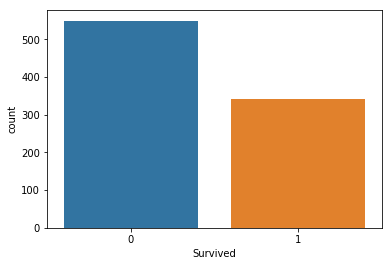

In [5]:
sns.countplot(x='Survived', data=train)

In [20]:
train['Cabin'].apply(lambda x: (x[0], x[1:]))

TypeError: 'float' object is not subscriptable

In [32]:
import re
def get_title(name): 
    return re.split(r"\,|\.", name)[1]
train['Title'] = train['Name'].apply(get_title)

train['Deck'] = train['Cabin'].str.slice(stop=1)
train['CabinNumber'] = train['Cabin'].str.slice(start=1)

train['Sex'] = train['Sex'].map({ 'female': 0, 'male': 1})

In [33]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,CabinNumber
886,887,0,2,"Montvila, Rev. Juozas",NaN,27.0,0,0,211536,13.00,NaN,S,Rev,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",NaN,19.0,0,0,112053,30.00,B42,S,Miss,B,42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",NaN,26.0,0,0,111369,30.00,C148,C,Mr,C,148
890,891,0,3,"Dooley, Mr. Patrick",NaN,32.0,0,0,370376,7.75,NaN,Q,Mr,NaN,NaN


In [35]:
train['CabinNumber'].value_counts()

33            7
6             6
20            5
101           5
2             5
49            5
36            4
50            4
35            4
23 C25 C27    4
96 B98        4
              4
30            3
28            3
68            3
5             3
19            3
26            3
17            3
24            3
4             3
78            3
77            3
38            3
7             3
22 C26        3
46            3
58 B60        2
 G73          2
22            2
             ..
71            1
 G63          1
11            1
82 B84        1
54            1
79            1
69            1
42            1
56            1
39            1
41            1
118           1
48            1
106           1
99            1
23            1
104           1
58            1
12            1
82            1
 E69          1
85            1
16            1
80            1
63            1
111           1
102           1
3             1
70            1
14            1
Name: CabinNumber, Lengt

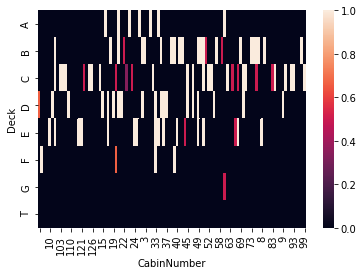

In [42]:
cabin_df = pd.pivot_table(train, values='Survived', index='Deck', columns='CabinNumber')
cabin_df = cabin_df.fillna(0)
sns.heatmap(cabin_df)


In [ ]:
survived_by_class = train.groupby(['Class', 'Survived']).size()
survived_by_class.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))